### Importing libraries

In [1]:
%reset -f

from functions import *

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/source/"

output_path = "./dataset/cleaned/"
output_filename = "dataset_rfm.csv"
output_dataset_file = "{}{}".format(output_path, output_filename)

### Importing all datasets

In [3]:
all_files = [f for f in listdir(input_path) if isfile(join(input_path, f))]

all_csv_files = [file for file in all_files if file.endswith(".csv")]
print(all_files)

print(all_csv_files)

['archive.zip', 'olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']
['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']


In [4]:
for index, dataset_csv in enumerate(all_csv_files):
    name = dataset_csv.split(".")[0]
    if name.startswith("olist"):
        list_name = name.split("_")[1:-1]
        name = "_".join(list_name)
        #print(name)
    #else:
    #    print(name)
    #continue
    #print(name)
    globals()["dataset_" + name] = load_data(input_path, dataset_csv)
    df = globals()["dataset_" + name]

    print("This is the dataset n°{} : {}".format(index + 1, name))
    display(df.head(5))
    display(df.info())

___Loading raw dataset___
Initial shape : (99441, 5)
This is the dataset n°1 : customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

___Loading raw dataset___
Initial shape : (1000163, 5)
This is the dataset n°2 : geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

___Loading raw dataset___
Initial shape : (99441, 8)
This is the dataset n°3 : orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

___Loading raw dataset___
Initial shape : (112650, 7)
This is the dataset n°4 : order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

___Loading raw dataset___
Initial shape : (103886, 5)
This is the dataset n°5 : order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

___Loading raw dataset___
Initial shape : (99224, 7)
This is the dataset n°6 : order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

___Loading raw dataset___
Initial shape : (32951, 9)
This is the dataset n°7 : products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

___Loading raw dataset___
Initial shape : (3095, 4)
This is the dataset n°8 : sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

___Loading raw dataset___
Initial shape : (71, 2)
This is the dataset n°9 : product_category_name_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

### 1) Merging customers / orders / order_items

##### customers / orders

In [5]:
dataset_merged_customers = dataset_orders.merge(dataset_customers, on='customer_id', how='inner')

print(dataset_orders.shape)
print(dataset_customers.shape)
display(dataset_merged_customers)

display(dataset_merged_customers.info())

(99441, 8)
(99441, 5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


None

##### customers - orders / order_items

In [6]:
dataset_merged = dataset_merged_customers.merge(dataset_order_items, on='order_id', how='inner')

print(dataset_merged_customers.shape)
print(dataset_order_items.shape)

display(dataset_merged)
display(dataset_merged.info())

(99441, 12)
(112650, 7)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   customer_unique_id             112650 non-null  object 
 9   customer_zip_code_prefix       112650 non-null  int64  
 10  customer_city                  112650 non-null  object 
 11  customer_state                 112650 non-null  object 
 12  order_item_id                 

None

##### cleaning dataset RFM

In [7]:
dataset_merged.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [8]:
columns_to_keep = ['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price']

In [9]:
dataset_rfm_v1 = dataset_merged.copy()
dataset_rfm_v1 = dataset_rfm_v1[columns_to_keep]

dataset_rfm_v1

,customer_unique_id,order_id,order_purchase_timestamp,price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90
...,...,...,...,...
112645,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,174.90
112646,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,205.99
112647,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,179.99
112648,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,179.99


##### Missing values : none since we did two inner join

In [10]:
dataset_rfm_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_unique_id        112650 non-null  object 
 1   order_id                  112650 non-null  object 
 2   order_purchase_timestamp  112650 non-null  object 
 3   price                     112650 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.3+ MB


### 2) RFM dataset

##### RFM
1) Recency : number of days since last purchase
2) Frequency : count total number of orders
3) Monetary : sum total price

##### Convert dates to datime object

In [11]:
dataset_rfm_v2 = dataset_rfm_v1.copy()
dataset_rfm_v2['order_purchase_timestamp'] = pd.to_datetime(dataset_rfm_v2['order_purchase_timestamp'].astype(str), format='%Y/%m/%d') # .astype(str)

dataset_rfm_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_unique_id        112650 non-null  object        
 1   order_id                  112650 non-null  object        
 2   order_purchase_timestamp  112650 non-null  datetime64[ns]
 3   price                     112650 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.3+ MB


In [12]:
print("We have {} unique customers.".format(dataset_rfm_v2["customer_unique_id"].unique().shape[0]))

We have 95420 unique customers.


##### Last day recorded in the dataset

In [13]:
last_day_recorded = dataset_rfm_v2["order_purchase_timestamp"].max()

print("Last day recorded in the dataset :", last_day_recorded, type(last_day_recorded))

print("Year :", last_day_recorded.year)
print("Month :", last_day_recorded.month)
print("Day :", last_day_recorded.day)

Last day recorded in the dataset : 2018-09-03 09:06:57 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Year : 2018
Month : 9
Day : 3


##### Groupby and aggregation functions

In [14]:
df = dataset_rfm_v2.copy()

# Time limit
time_limit = max(df.order_purchase_timestamp) #+ dt.timedelta(1)

In [15]:
time_limit

Timestamp('2018-09-03 09:06:57')

In [16]:
# Computes the number of days since last purchase using the max/last purchase date.
# Counts the number of order id,
# Sums the total price

df = df.groupby('customer_unique_id').agg({'order_purchase_timestamp' : lambda x: (time_limit - x.max()).days,
                                  'order_id' : pd.Series.nunique,
                                  'price' : 'sum',
                                  })
# Rename columns
dataset_rfm = df.rename(columns = {'order_purchase_timestamp' : 'Recency',
                     'order_id' : 'Frequency',
                     'price' : 'Monetary'}) #, inplace = True)

In [17]:
display(dataset_rfm)

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
0000f46a3911fa3c0805444483337064,541,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00
fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
ffff371b4d645b6ecea244b27531430a,572,1,89.90


#### Giving a rank to each customer based on RFM

In [212]:
def order_cluster(data_frame, col_cluster_name, col_name, nb_clusters, ascending):
    """

    :return:
    """
    df = data_frame.copy()

    print("Before")
    display(df[[col_cluster_name, col_name]].groupby(col_cluster_name).describe())

    # step 1
    order = {}
    for nb_cls in range(nb_clusters):
        cls_min = df[df[col_cluster_name] == nb_cls].min()
        order[nb_cls] = cls_min[col_name]

    l = [(order[key], key) for key in order.keys()]
    if ascending:  # True / increasing order
        l.sort()
        #print(l)
    else:  # decreasing order
        l.sort(reverse=True)
        #print(l)

    # step 2
    order_cluster = {}

    for nb_cls in range(nb_clusters):
        order_cluster[l[nb_cls][1]] = nb_cls
        #order_cluster[nb_cls] = l[nb_cls][1]
    #print(order_cluster)

    # step 3
    df[col_cluster_name] = df[col_cluster_name].map(order_cluster)

    # verification
    print("After")
    display(df[[col_cluster_name, col_name]].groupby(col_cluster_name).describe())

    return df

In [182]:
rfm_table = dataset_rfm.copy()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)


def apply_kmeans(all_columns):
    """

    :param all_columns:
    :return:
    """
    global rfm_table

    for col in all_columns:
        if col == 'Recency':
            kmeans.fit(rfm_table[[col]])
            rfm_table[col +'_cluster'] = kmeans.predict(rfm_table[[col]])
            rfm_table = order_cluster(rfm_table, col +'_cluster', col, 4, False)
        else:
            kmeans.fit(rfm_table[[col]])
            rfm_table[col +'_cluster']= kmeans.predict(rfm_table[[col]])
            rfm_table = order_cluster(rfm_table, col +'_cluster', col, 4, True)

In [183]:
cols = ['Recency','Frequency','Monetary']
apply_kmeans(cols)

Before


Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
1                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
2                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                254.0  
1                728.0  
2                405.0  
3                127.0

[(406.0, 1), (255.0, 2), (128.0, 0), (0.0, 3)]
{1: 0, 2: 1, 0: 2, 3: 3}
After


Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
1                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
2                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                728.0  
1                405.0  
2                254.0  
3                127.0

Before


Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

[(1.0, 0), (2.0, 1), (3.0, 2), (5.0, 3)]
{0: 0, 1: 1, 2: 2, 3: 3}
After


Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

Before


Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
1                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
2                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  329.0    550.90  
1                  960.0   1520.88  
2                  109.0    175.66  
3                 2300.0  13440.00

[(0.85, 2), (175.79, 0), (550.99, 1), (1534.9, 3)]
{2: 0, 0: 1, 1: 2, 3: 3}
After


Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
1                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
2                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  109.0    175.66  
1                  329.0    550.90  
2                  960.0   1520.88  
3                 2300.0  13440.00

In [184]:
rfm_table

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,0,0
0000f46a3911fa3c0805444483337064,541,1,69.00,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,0,0
0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,0,1
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,0,0,3
fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,0,0
ffff371b4d645b6ecea244b27531430a,572,1,89.90,0,0,0


In [260]:
rfm_table['classification'] = 'none'
#Best Customers
rfm_table.loc[(rfm_table['Recency_cluster'] >= 2) # bought recently
              & (rfm_table['Monetary_cluster'] >= 2) # bought expensive stuff
              & (rfm_table['Frequency_cluster'] >= 2), # bought a lot
              'classification'] = 'top_customer'

#High-spending New Customers
rfm_table.loc[(rfm_table['Recency_cluster'] == 3) & # bought recently
              (rfm_table['Monetary_cluster'] >= 2) & # bought expensive stuff
              (rfm_table['Frequency_cluster'] == 0), # bought once or not a lot of orders
              'classification'] = 'high_spending_new_customer'


#Lowest-spending active loyal customers
rfm_table.loc[(rfm_table['Recency_cluster'] >= 1) & # bought recently or not sooo long ago
              (rfm_table['Monetary_cluster'] == 0) & # bought cheap stuff
              (rfm_table['Frequency_cluster'] >= 1), # bought a lot of orders
              'classification'] = 'low_spending_loyal_customer'

#Churned Best Customers
rfm_table.loc[(rfm_table['Recency_cluster'] <= 1) # didn't buy recently
              & (rfm_table['Monetary_cluster'] >= 2) # bought expensive stuff
              & (rfm_table['Frequency_cluster'] >= 2), # bought a lot of orders
              'classification'] = 'churned_top_customer'

# ena :

#Lowest-spending New Customers
rfm_table.loc[(rfm_table['Recency_cluster'] == 3) & # bought recently
              (rfm_table['Monetary_cluster'] == 0) & # bought expensive stuff
              (rfm_table['Frequency_cluster'] == 0), # bought once or not a lot of orders
              'classification'] = 'low_spending_new_customer'

#Lowest-spending only_bought_once customers
rfm_table.loc[(rfm_table['Recency_cluster'] <= 2) & # bought recently or not sooo long ago
              (rfm_table['Monetary_cluster'] == 0) & # bought cheap stuff
              (rfm_table['Frequency_cluster'] == 0), # bought once
              'classification'] = 'low_spending_customer_only_bought_once'

In [243]:
rfm_table

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,classification
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,0,0,low_spending_new_customer
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,0,0,low_spending_new_customer
0000f46a3911fa3c0805444483337064,541,1,69.00,0,0,0,low_spending_customer_only_bought_once
0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,0,0,low_spending_customer_only_bought_once
0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,0,1,none
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,0,0,3,none
fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,0,0,low_spending_customer_only_bought_once
ffff371b4d645b6ecea244b27531430a,572,1,89.90,0,0,0,low_spending_customer_only_bought_once


In [261]:
data = rfm_table['classification']

data.value_counts()

low_spending_customer_only_bought_once    53810
low_spending_new_customer                 20055
none                                      19512
low_spending_loyal_customer                1177
high_spending_new_customer                  809
top_customer                                 44
churned_top_customer                         13
Name: classification, dtype: int64

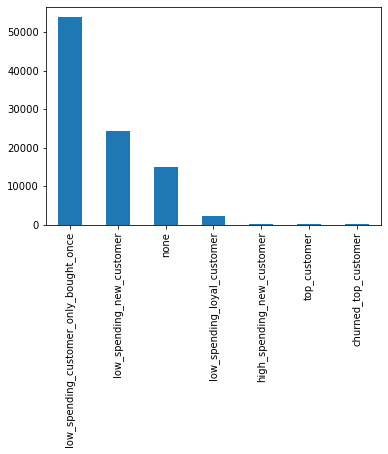

In [259]:
data.value_counts().plot(kind='bar');

In [213]:
print("To get a segmentation idea")
rfm_table[rfm_table['classification'] == 'none']

To get a segmentation idea


,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,classification
customer_unique_id,,,,,,,
0000f46a3911fa3c0805444483337064,541,1,69.00,0,0,0,none
0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,0,0,none
0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,0,1,none
0004bd2a26a76fe21f786e4fbd80607f,150,1,154.00,2,0,0,none
00050ab1314c0e55a6ca13cf7181fecf,135,1,27.99,2,0,0,none
...,...,...,...,...,...,...,...
fffcc512b7dfecaffd80f13614af1d16,145,1,688.00,2,0,2,none
fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,0,0,3,none
fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,0,0,none


#### Statistics RFM dataset

In [18]:
dataset_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95420 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    95420 non-null  int64  
 1   Frequency  95420 non-null  int64  
 2   Monetary   95420 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.9+ MB


In [19]:
dataset_rfm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,242.600377,153.160320,0.00,118.0,223.0,352.0,728.0
Frequency,95420.0,1.034018,0.211234,1.00,1.0,1.0,1.0,16.0
Monetary,95420.0,142.440198,217.656355,0.85,47.9,89.9,155.0,13440.0


##### Correlation matrix

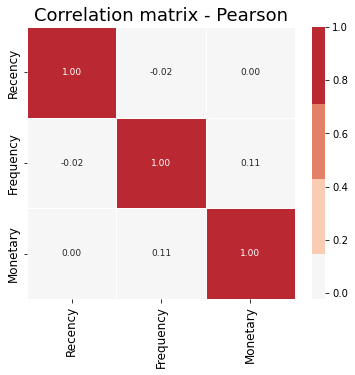

In [20]:
correlation_matrix(dataset_rfm, width=6, height=5)

##### Density

___Density distribution___


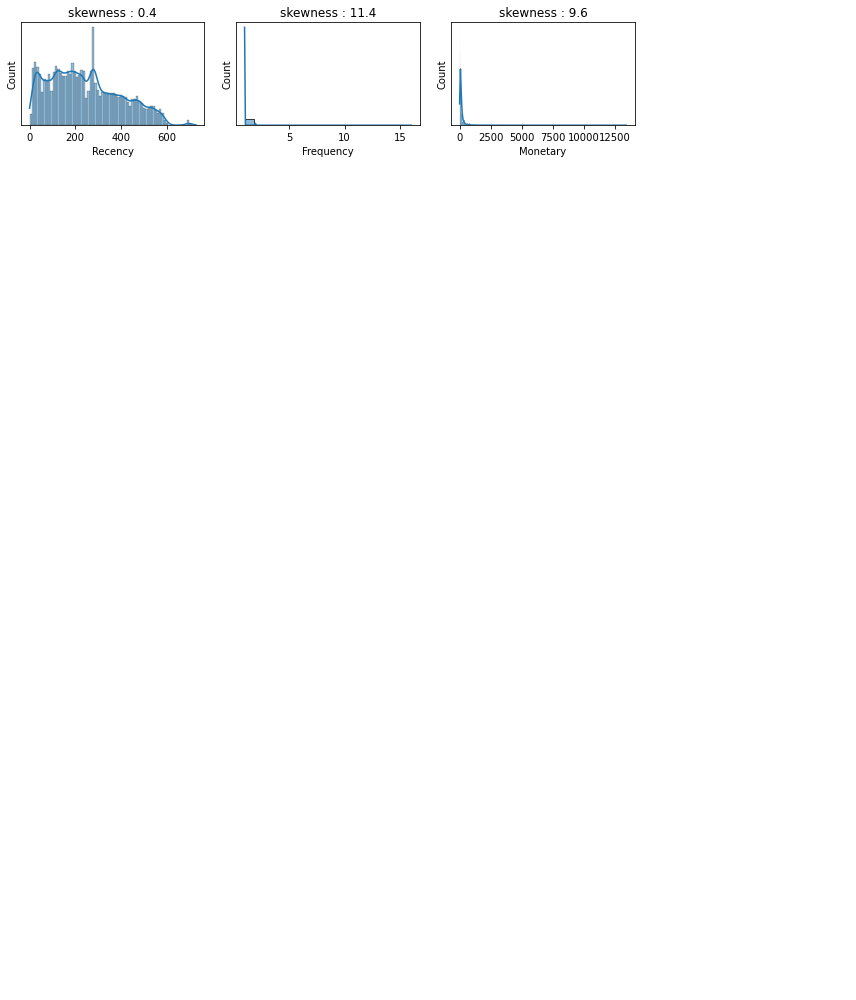

In [21]:
density_histplot(dataset_rfm)

##### Box plot

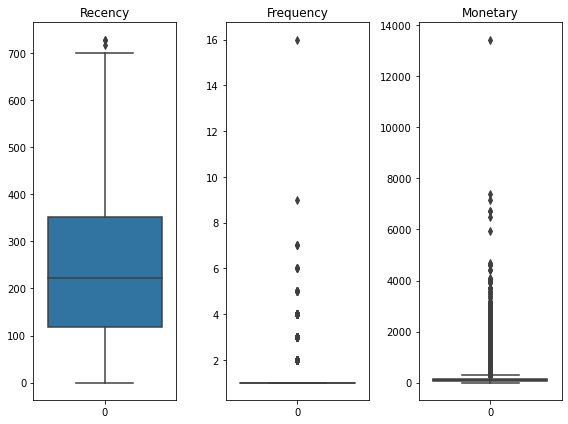

In [22]:
display_boxplot(dataset_rfm)

### 3) Saving dataset

In [23]:
# We reset the index
#final_dataset = dataset_v3.reset_index(drop=True)

# Save
dataset_rfm.to_csv(output_dataset_file)#, index=False)

In [24]:
# End of exploration time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 26.380976 sec
computing time : 00:00:26
